# VIMS-IR Uncertainties analysis - Part. 2: Data Analysis

D. Cordier, B. Seignovert
  - December 6th, 2022.
  
**Purpose**
  - This material supports the research note "*Photometric Uncertainties of Cassini VIMS-IR Iinstrument*" by Daniel Cordier, Benoît Seignovert, Stéphane Le Mouélic and Christophe Sotin.
  - The collection of selected VIMS-IR cubes has to be imported and within each individual cube a set of 3x3 pixels boxes are randomly selected. 
  - `pandas` is a powerful Python package dedicated to data analysis, in a `pandas` workflow datasets are recorded in specific files called `DataFrames`.
  - in this notebook we import the VIMS-IR cubes, and extract data from each of these 149 files, data are eventually stored in two `pandas` `DataFrames` which are saved in two specific `HDF5` files.

**Python requirements** 
We list below the required Python modules that have to been installed on the user machine:

**Installation of the Python VIRTUAL ENVIRONMENT**
  - `mkdir env_VIMSuncert`
  - `python3 -m venv env_VIMSuncert`
  - activation of the virtual environment: `source env_VIMSuncert/bin/activate`
  - `pip install pip --upgrade`
  - `pip install pyvims`
  - `pip install pandas`

In [1]:
import pandas as pd
from urllib.request import urlretrieve
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.image import imread

import VIMSU_2 as v2

# We read the `HDF5` file containing global features of cubes

- To be adapted if you want to use our own file.

In [2]:
#DataFrame_Cube_FileName = 'ANALYSIS_HDF5/stoDFrame_CubeData_NEW.hdf5'
DataFrame_Cube_FileName = 'DF_CubeData_TEST.hdf5'
CubesDF_file = pd.HDFStore(DataFrame_Cube_FileName)

# We read the `HDF5` file containing 3x3 pixels boxes

In [3]:
#DataFrame_Pave_FileName = 'ANALYSIS_HDF5/stoDFrame_PavData_NEW.hdf5'
DataFrame_Pave_FileName = 'DF_BoxData_TEST.hdf5'
PavDF_file = pd.HDFStore(DataFrame_Pave_FileName)

# Quick overview of data recorded in `HDF5` files

### Dataset available in the `cubes file`

In [4]:
CubesDF_file.keys()

['/Cubes_global_data']

### We load the dataset 

 - *i.e.* the `DataFrame` here, in accordance with `Pandas` terminology

In [5]:
Cubes_DF = CubesDF_file['Cubes_global_data']

A quick look to the *DataFrame* content:

In [6]:
Cubes_DF

,Cube name,Nsample,Nline,Npix,Expo Time,Ls,dT1,dT2,dT3,iT1,iT2,oT1,oT2,oT3
0,1757669180_1,48,6,288,0.162760,49.195652,59.994553,58.759590,232.471130,130.267487,129.860535,133.989594,127.174942,272.972565
1,1560456180_1,64,64,4096,0.081380,332.739802,61.199310,60.215565,234.399765,134.451172,132.978119,137.106293,132.399017,274.901215
2,1575514957_1,48,23,1104,0.325520,338.986820,60.424538,59.487789,234.399765,132.358261,131.938309,136.066849,131.353134,274.901215
3,1537735045_1,16,16,256,0.097656,323.235759,60.510571,59.487789,232.471130,131.312607,129.860535,133.989594,129.262970,273.936890
4,1687300377_1,6,64,384,0.223795,23.087123,59.307236,58.030975,234.399765,132.358261,131.938309,136.066849,130.307785,274.901215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1575515440_1,48,23,1104,0.325520,338.986820,60.424538,59.487789,234.399765,132.358261,131.938309,136.066849,131.353134,274.901215
145,1537734601_1,16,16,256,0.097656,323.235759,60.510571,59.487789,232.471130,131.312607,129.860535,135.027954,129.262970,273.936890
146,1757669576_1,48,6,288,0.162760,49.195652,59.994553,58.759590,232.471130,130.267487,129.860535,133.989594,127.174942,272.972565
147,1537735077_1,16,16,256,0.097656,323.235759,60.510571,59.487789,232.471130,131.312607,129.860535,133.989594,129.262970,273.936890


**Label significance**
 - `Cube name`: VIMS cube name
 - `Nsample`: sample number of the cube
 - `Nline`: line number of the cube
 - `Npix`: number of pixel of the cube
 - `Expo Time`: exposure time
 - `Ls`: solar longitude
 - `dT1`, `dT2`, `dT3`: the 3 detector temperatures.
 - `iT1`, `iT2`: the instrument temperatures.
 - `oT1`, `oT2`, `oT3`: the optics temperatures.


How to get the columns labels:

In [7]:
Cubes_DF.columns

Index(['Cube name', 'Nsample', 'Nline', 'Npix', 'Expo Time', 'Ls', 'dT1',
       'dT2', 'dT3', 'iT1', 'iT2', 'oT1', 'oT2', 'oT3'],
      dtype='object')

An example of how to get one column content in a Python list:

In [8]:
list(Cubes_DF['Cube name'])

['1757669180_1',
 '1560456180_1',
 '1575514957_1',
 '1537735045_1',
 '1687300377_1',
 '1548750240_1',
 '1537734744_1',
 '1757670120_1',
 '1757667322_1',
 '1560454320_1',
 '1640663119_4',
 '1757669625_1',
 '1503393481_3',
 '1537735378_1',
 '1643411254_1',
 '1757669724_1',
 '1753536201_1',
 '1757669971_1',
 '1743896649_1',
 '1643413825_1',
 '1537735965_1',
 '1757669922_1',
 '1537735267_1',
 '1757668932_1',
 '1687300993_1',
 '1732875761_1',
 '1802456986_1',
 '1757670268_1',
 '1537735822_1',
 '1757669229_1',
 '1548751578_1',
 '1585151088_1',
 '1757669526_1',
 '1643411921_1',
 '1757669031_1',
 '1585153538_1',
 '1629908689_1',
 '1790059235_1',
 '1757669873_1',
 '1805211625_1',
 '1537734712_1',
 '1743896394_1',
 '1560451716_1',
 '1753537175_1',
 '1643412398_1',
 '1537735410_1',
 '1560456861_1',
 '1548750098_1',
 '1757669081_1',
 '1655789532_1',
 '1802456559_1',
 '1757670169_1',
 '1537735933_1',
 '1548750964_1',
 '1757668982_1',
 '1757670021_1',
 '1721859857_1',
 '1537734934_1',
 '1805210863_1

Example of how to get a column value for a given cube:

In [9]:
float(Cubes_DF[Cubes_DF['Cube name'] == '1687300377_1']['Expo Time'])

0.223795

Finally, how to get the metadata of the considered *DataFrame*:

In [10]:
myMD_Cubes_global_data = CubesDF_file.get_storer('Cubes_global_data').attrs.metadata
myMD_Cubes_global_data

{'Cube name': 'Cube identification',
 'Nsample': "Max. index value in 'sample' axis",
 'Nline': "Max. index value in 'line' axis",
 'Npix': 'Total number of cube pixels',
 'Expo Time': 'Exposure time',
 'Ls': 'Solar longitude (in degrees)',
 'dT1': 'Detector temperature 1 (Detector IR high resolution) in K',
 'dT2': 'Detector temperature 2 (Detector IR low resolution) in K',
 'dT3': 'Detector temperature 3 (Detector Visible) in K',
 'iT1': 'Instrument temperature 1 (Instrument IR spectrometer) in K',
 'iT2': 'Instrument temperature 2 (Instrument grating) in K',
 'oT1': 'Optics temperature 1 (Optics IR primary) in K',
 'oT2': 'Optics temperature 2 (Optics IR secondary) in K',
 'oT3': 'Optics temperature 3 (Optics Visible) in K'}

### Dataset availble in the 3x3 pixels boxes file

In [11]:
PavDF_file = pd.HDFStore(DataFrame_Pave_FileName)

In [12]:
PavDF_file.keys()

['/Paves3x3_data']

In [13]:
Pav_DF = PavDF_file['Paves3x3_data']
Pav_DF 

,Cube name,Npav,iPav,s,l,lat,lon,res,DIsF_1,DIsF_2,...,IFav_253,IFav_254,IFav_255,IFav_256,Dinc,incAv,Deme,emeAv,Dphase,phaseAv
0,1757669180_1,18,0,39,4,-6.259607,253.663752,7.314221,-2.067947,-2.114799,...,0.010272,0.017098,0.008079,0.007884,0.001968,72.570553,0.006343,63.920318,0.000496,90.242620
1,1757669180_1,18,1,26,4,-6.213746,251.492679,7.299453,-1.921568,-2.040612,...,0.010594,0.020652,0.012120,0.008386,0.002076,70.574298,0.006148,63.427765,0.000492,90.564581
2,1757669180_1,18,2,42,5,-5.803242,254.268518,7.349410,-2.101218,-2.105552,...,0.009793,0.018120,0.010278,0.011355,0.001982,72.943942,0.006267,64.558641,0.000500,90.217419
3,1757669180_1,18,3,43,3,-6.690986,254.230729,7.288315,-2.001636,-2.149471,...,0.009342,0.016395,0.007233,0.006506,0.001915,73.263606,0.006173,63.630735,0.000498,90.094475
4,1757669180_1,18,4,34,5,-5.822516,252.916142,7.339078,-2.011940,-2.088099,...,0.011190,0.014998,0.009560,0.008596,0.002051,71.713349,0.006190,64.194245,0.000499,90.415710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25681,1732876622_1,384,379,23,11,-6.000489,200.170413,6.892079,-1.986948,-2.271923,...,0.023883,0.012925,0.016286,0.015625,0.005666,23.319112,0.004628,31.223399,0.000280,54.509077
25682,1732876622_1,384,380,19,3,-4.682139,199.424906,6.803436,-1.859823,-2.170247,...,0.017115,0.017684,0.017566,0.020061,0.007889,21.887242,0.005986,32.814876,0.000362,54.638394
25683,1732876622_1,384,381,32,44,-10.889335,204.187461,7.267795,-1.967539,-2.159479,...,0.027848,0.031879,0.033699,0.019754,0.005992,29.047082,0.007520,25.061248,0.000360,54.016165
25684,1732876622_1,384,382,8,29,-5.807378,203.990153,7.118540,-1.730717,-2.130701,...,0.019733,0.014945,0.023955,0.025949,0.005473,24.194590,0.004928,30.705171,0.000283,54.602466


In [14]:
Pav_DF.columns

Index(['Cube name', 'Npav', 'iPav', 's', 'l', 'lat', 'lon', 'res', 'DIsF_1',
       'DIsF_2',
       ...
       'IFav_253', 'IFav_254', 'IFav_255', 'IFav_256', 'Dinc', 'incAv', 'Deme',
       'emeAv', 'Dphase', 'phaseAv'],
      dtype='object', length=526)

In [15]:
myMD_Pav_data = PavDF_file.get_storer('Paves3x3_data').attrs.metadata
myMD_Pav_data

{'Cube name': 'Cube identification',
 'Nsample': "Max. index value in 'sample' axis",
 'Nline': "Max. index value in 'line' axis",
 'Npix': 'Total number of cube pixels',
 'Expo Time': 'Exposure time',
 'Ls': 'Solar longitude (in degrees)',
 'dT1': 'Detector temperature 1 (Detector IR high resolution) in K',
 'dT2': 'Detector temperature 2 (Detector IR low resolution) in K',
 'dT3': 'Detector temperature 3 (Detector Visible) in K',
 'iT1': 'Instrument temperature 1 (Instrument IR spectrometer) in K',
 'iT2': 'Instrument temperature 2 (Instrument grating) in K',
 'oT1': 'Optics temperature 1 (Optics IR primary) in K',
 'oT2': 'Optics temperature 2 (Optics IR secondary) in K',
 'oT3': 'Optics temperature 3 (Optics Visible) in K'}

# Plot of spatial distribution of 3x3 boxes

#### Extraction of coordinate (lat,lon) of boxes central pixels

In [16]:
mes_lat = Pav_DF.iloc[:, 5:6].to_numpy()
mes_lon = Pav_DF.iloc[:, 6:7].to_numpy()

#### Plot background

In [17]:
PIA22770 = Path('PIA22770.jpg')
if not PIA22770.exists():
    urlretrieve('https://photojournal.jpl.nasa.gov/jpeg/PIA22770.jpg', PIA22770)
bg = imread(PIA22770)

#### Plot of the spatial distribution over Titan surface

**Remark** It should take a few seconds

CPU times: user 3.42 s, sys: 18.4 ms, total: 3.44 s
Wall time: 3.44 s


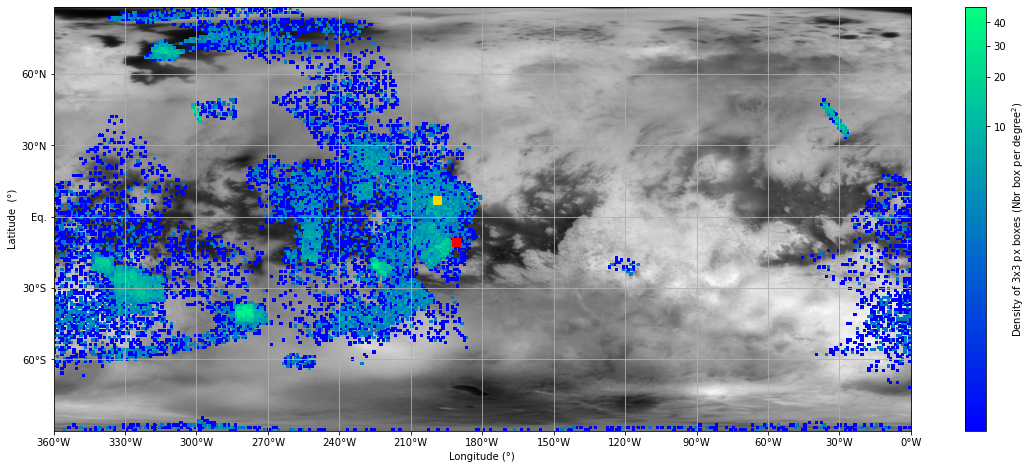

In [18]:
%%time
v2.plot_boxes_map(bg,mes_lon,mes_lat,"boxes_map_Titan.pdf")

# Distribution of spatial resolution of central pixels

<AxesSubplot:xlabel='Central pixels resolution (km)'>

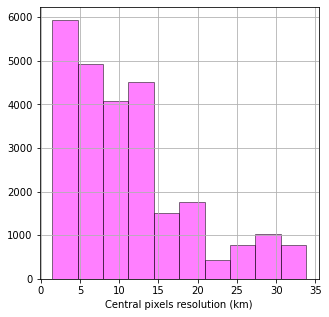

In [19]:
plt.xlabel('Central pixels resolution (km)')
Pav_DF['res'].hist(alpha=0.5, color='fuchsia', edgecolor='k', figsize=(5,5))

# Distribution of solar longitude

<AxesSubplot:xlabel='Solar longitude (°)', ylabel='Number of cubes'>

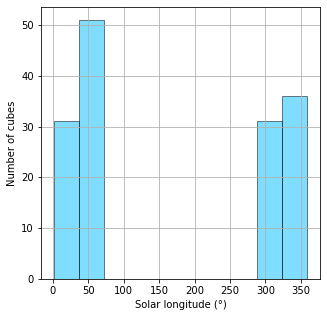

In [20]:
plt.xlabel('Solar longitude (°)')
plt.ylabel('Number of cubes')
Cubes_DF['Ls'].hist(alpha=0.5, color='deepskyblue', edgecolor='k', figsize=(5,5))

# We built the specifications of spectral bands

In [21]:
nbr_band= 6                         # Number of VIMS spectral bands taken into account.
band    = [[]]*nbr_band
band[0] = [7,     8, 'olive']       # Spectral band boundaries (channel numbers), associated Matplotlib color
band[1] = [16,   18, 'hotpink']
band[2] = [30,   34, 'slategray']
band[3] = [50,   53, 'coral']
band[4] = [88,   93, 'deepskyblue']
band[5] = [170, 180, 'goldenrod']

# We compute average and standard deviation of $I/F$ in 3x3 px boxes

**Remark** `Dang` is a constraint on angles (incidence, emergence, phase) standard deviation within a box, value larger than $1$ relaxes the constraint.

In [22]:
Dang= 3e-0
IsFav_band, DIsF_band = v2.IsFavBand(Pav_DF,band,Dang)

# We resume what we got

In [23]:
for i in range(nbr_band):
    print ( ' > Bande ',i,' : ', len(IsFav_band[i]), ' points')

print ( '   ----------------------------------------')
tot= len(IsFav_band[0])+len(IsFav_band[1])+len(IsFav_band[2])+ \
     len(IsFav_band[3])+len(IsFav_band[4])+len(IsFav_band[5])
print ( '   Total   : ', tot, ' points')

 > Bande  0  :  51286  points
 > Bande  1  :  76929  points
 > Bande  2  :  128215  points
 > Bande  3  :  102572  points
 > Bande  4  :  153812  points
 > Bande  5  :  277688  points
   ----------------------------------------
   Total   :  790502  points


# Plot of the extracted data

Band 1: 7-8 | 1.007-1.023 µm
Band 2: 16-18 | 1.155-1.187 µm
Band 3: 30-34 | 1.384-1.450 µm
Band 4: 50-53 | 1.713-1.762 µm
Band 5: 88-93 | 2.340-2.423 µm
Band 6: 170-180 | 3.706-3.872 µm


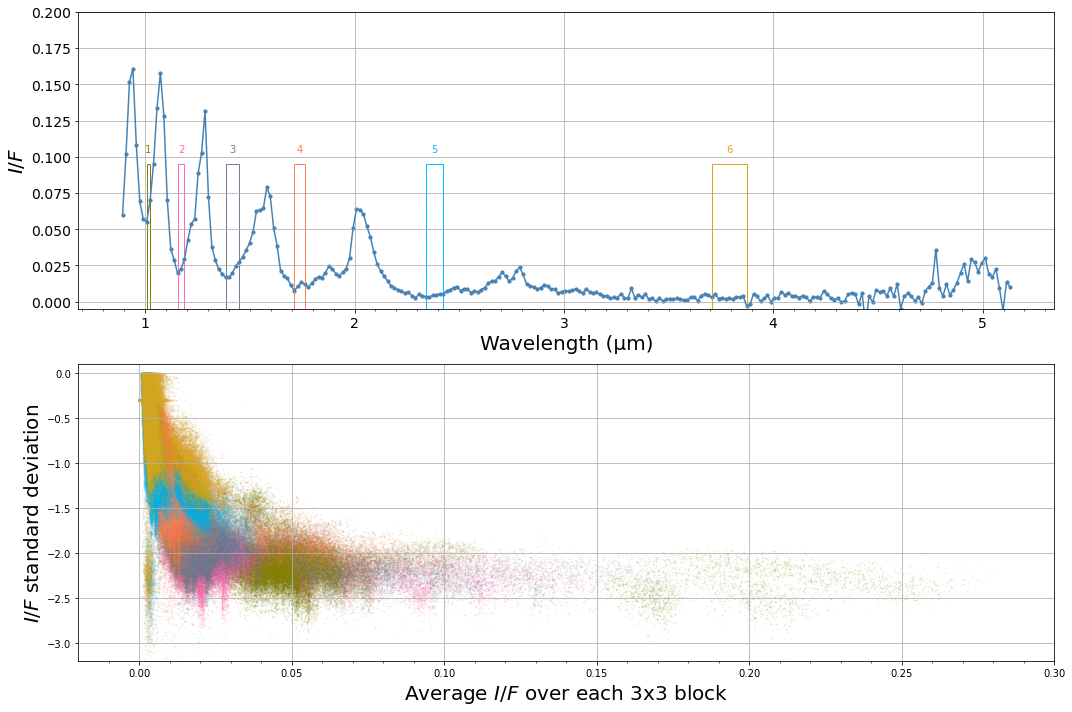

In [25]:
cname    = '1732876622_1'
cubes_dir='TEST'
figname  ='fig_DIsF_IsFaverage.png'

v2.plot_band_avIF_DIF(band,cubes_dir,cname,IsFav_band,DIsF_band,figname)